In [2]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
#!pip install wittgenstein
import wittgenstein as lw

In [3]:
features = pd.read_csv('data/fma_metadata/df_senzaOutliers.csv',index_col=[0], header=[0,1,2])

features

feature    chroma_stft       mfcc                                    \
statistics        mean        max                                     
number              01         01         03          04         07   
track_id                                                              
2             0.696063  28.657707  52.424423  103.289833  37.843021   
3             0.449602  29.380682  76.742714  137.245010  55.662521   
5             0.481160 -40.500740  50.373932  112.312531  29.266182   
10            0.388109  20.196968  60.412815   78.466721  21.597277   
134           0.438062 -41.723225  58.687328  125.922821  37.450359   
...                ...        ...        ...         ...        ...   
155297        0.408626   3.826046  94.208336   48.085751  26.723190   
155298        0.439034 -72.790154  81.013275  124.569000  29.571426   
155306        0.369401  -7.814734  88.024063  116.180260  29.388819   
155307        0.357939 -13.889938  62.219879   93.028778  41.311356   
155314        0.551894 -15.305521  32.737503   95.054657  25.620636   

feature                                                                ...  \
statistics                   mean           min                        ...   
number             11          02            02         04         05  ...   
track_id                                                               ...   
2           27.737400  116.696678 -1.421085e-14 -51.569004 -97.879890  ...   
3           26.740063  120.158501 -1.851665e+01 -12.548506 -87.048355  ...   
5           27.197964  132.215073 -6.228398e+01 -24.319845 -74.060310  ...   
10          24.780317  157.040085  5.151435e-14 -50.578659 -45.113949  ...   
134         36.486378  125.521309 -9.427860e-01 -90.334747 -67.671829  ...   
...               ...         ...           ...        ...        ...  ...   
155297      19.866936  163.954620 -1.776357e-14 -29.221125 -28.104187  ...   
155298      38.472843  160.770218 -7.993606e-14  -7.314378 -69.236115  ...   
155306      47.185654  177.614151  5.329071e-15 -49.451691 -70.841232  ...   
155307      33.690544  124.228142 -5.892177e+00 -50.547176 -99.119080  ...   
155314      34.402496  166.692734 -2.464827e-01 -55.172737 -55.477066  ...   

feature                          spectral_bandwidth spectral_contrast  \
statistics        std                      kurtosis               max   
number             02         04                 01                03   
track_id                                                                
2           38.569584  20.767921           3.874384         39.333603   
3           41.191982  22.025253           2.383340         42.141411   
5           39.367599  24.319347           0.895442         39.017235   
10          44.409843  14.013119           0.437628         45.410881   
134         47.266518  36.841534           0.372903         41.526760   
...               ...        ...                ...               ...   
155297      30.287067  12.060067          20.706787         40.720093   
155298      39.359367  18.604885           5.868375         39.627396   
155306      40.537926  28.671246           4.375974         40.628235   
155307      35.382370  22.123117          -0.383395         48.715477   
155314      26.786989  22.369673           0.011010         39.460281   

feature                           tonnetz metadata                              
statistics                  min       std      set         track                
number             04        02        01   subset     genre_top genre_top_Cat  
track_id                                                                        
2           31.513493  2.296826  0.019809    small       Hip-Hop             7  
3           31.473713  0.652681  0.026316   medium       Hip-Hop             7  
5           33.707951  2.314010  0.025550    small       Hip-Hop             7  
10          28.711344  4.415900  0.021413    small           Pop            12  
134         32.2243

In [4]:
attributes = [col for col in features.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset')  and
                                                 col != ('metadata','track','genre_top_Cat'))] 

X = features[attributes].values
y = features[('metadata','track','genre_top_Cat')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

In [5]:
features.drop([('metadata','track','genre_top_Cat'),('metadata','set','subset')],axis=1)

feature    chroma_stft       mfcc                                    \
statistics        mean        max                                     
number              01         01         03          04         07   
track_id                                                              
2             0.696063  28.657707  52.424423  103.289833  37.843021   
3             0.449602  29.380682  76.742714  137.245010  55.662521   
5             0.481160 -40.500740  50.373932  112.312531  29.266182   
10            0.388109  20.196968  60.412815   78.466721  21.597277   
134           0.438062 -41.723225  58.687328  125.922821  37.450359   
...                ...        ...        ...         ...        ...   
155297        0.408626   3.826046  94.208336   48.085751  26.723190   
155298        0.439034 -72.790154  81.013275  124.569000  29.571426   
155306        0.369401  -7.814734  88.024063  116.180260  29.388819   
155307        0.357939 -13.889938  62.219879   93.028778  41.311356   
155314        0.551894 -15.305521  32.737503   95.054657  25.620636   

feature                                                                ...  \
statistics                   mean           min                        ...   
number             11          02            02         04         05  ...   
track_id                                                               ...   
2           27.737400  116.696678 -1.421085e-14 -51.569004 -97.879890  ...   
3           26.740063  120.158501 -1.851665e+01 -12.548506 -87.048355  ...   
5           27.197964  132.215073 -6.228398e+01 -24.319845 -74.060310  ...   
10          24.780317  157.040085  5.151435e-14 -50.578659 -45.113949  ...   
134         36.486378  125.521309 -9.427860e-01 -90.334747 -67.671829  ...   
...               ...         ...           ...        ...        ...  ...   
155297      19.866936  163.954620 -1.776357e-14 -29.221125 -28.104187  ...   
155298      38.472843  160.770218 -7.993606e-14  -7.314378 -69.236115  ...   
155306      47.185654  177.614151  5.329071e-15 -49.451691 -70.841232  ...   
155307      33.690544  124.228142 -5.892177e+00 -50.547176 -99.119080  ...   
155314      34.402496  166.692734 -2.464827e-01 -55.172737 -55.477066  ...   

feature                                                spectral_bandwidth  \
statistics      skew         std                                 kurtosis   
number            04          01         02         04                 01   
track_id                                                                    
2           0.043292   97.809044  38.569584  20.767921           3.874384   
3          -0.026875  111.686371  41.191982  22.025253           2.383340   
5          -0.108640   95.049904  39.367599  24.319347           0.895442   
10         -0.561734  102.743553  44.409843  14.013119           0.437628   
134        -0.479446  102.779747  47.266518  36.841534           0.372903   
...              ...         ...        ...        ...                ...   
155297      0.369148   91.869461  30.287067  12.060067          20.706787   
155298      0.602545   94.696381  39.359367  18.604885           5.868375   
155306      0.172813  109.087028  40.537926  28.671246           4.375974   
155307     -0.412079   80.234474  35.382370  22.123117          -0.383395   
155314     -1.755459   64.040298  26.786989  22.369673           0.011010   

feature    spectral_contrast                        tonnetz      metadata  
statistics               max                  min       std         track  
number                    03         04        02        01     genre_top  
track_id                                                                   
2                  39.333603  31.513493  2.296826  0.019809       Hip-Hop  
3                  42.141411  31.473713  0.652681  0.026316       Hip-Hop  
5                  39.017235  33.707951  2.314010  0.025550       Hip-Hop  
10                 45.410881  28.711344  4.415900  0.021413           Pop  

In [6]:
len(X_val)

4951

In [7]:
len(X_test)

4951

In [8]:
features['metadata','track'].drop_duplicates()

C:\Users\Federico\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2866: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


number,genre_top,genre_top_Cat
track_id,,
2,Hip-Hop,7
10,Pop,12
136,Rock,13
139,Folk,6
148,Experimental,5
237,Jazz,10
397,Electronic,4
666,International,9
734,Soul-RnB,14


In [6]:
features['metadata','track','genre_top_Cat'].value_counts()

13    7085
4     6238
7     2197
5     2153
6     1516
8     1323
12    1182
9     1013
1      618
11     502
10     382
2      178
14     154
15     116
0       74
3       21
Name: (metadata, track, genre_top_Cat), dtype: int64

In [7]:
ripper_clf = lw.RIPPER(random_state=0)

In [8]:
ripper_clf.fit(X_train, y_train,pos_class=13)

In [9]:
ripper_clf

<RIPPER(n_discretize_bins=10, max_rules=None, max_rule_conds=None, k=2, max_total_conds=None, dl_allowance=64, verbosity=0, prune_size=0.33, random_state=0)>

In [10]:
ripper_clf.score(X_test, y_test)

0.7535685429571775

In [11]:
ripper_clf.ruleset_

<Ruleset [17=20.86-30.18^2=-30.64-36.64^11=-3.68--1.01^4=22.84-28.19] V [17=20.86-30.18^13=24.62-28.32^1=-2.73-12.3^8=-14.05-17.73] V [17=20.86-30.18^13=24.62-28.32^14=12.96-14.87^18=3.83-4.13] V [17=20.86-30.18^14=12.96-14.87^19=0.02-0.02^7=-0.0--0.0] V [17=20.86-30.18^2=-30.64-36.64^18=3.83-4.13] V [17=20.86-30.18^18=3.56-3.83^6=162.16-171.46] V [17=20.86-30.18^2=36.64-50.69^11=-0.71--0.5^16=37.0-38.75] V [17=20.86-30.18^11=-3.68--1.01^5=20.73-24.44] V [17=20.86-30.18^13=24.62-28.32^9=-47.02--41.02^8=-14.05-17.73] V [17=20.86-30.18^14=14.87-16.42^4=28.19-31.94^19=0.03-0.03] V [17=20.86-30.18^2=36.64-50.69] V [16=26.89-37.0^4=22.84-28.19^11=-3.68--1.01^13=24.62-28.32] V [16=26.89-37.0^4=22.84-28.19^5=24.44-27.06^2=-30.64-36.64] V [17=30.18-31.98^14=12.96-14.87^13=5.35-24.62] V [7=-0.0--0.0^11=-3.68--1.01^2=50.69-61.22^10=-28.55--25.15] V [11=-3.68--1.01^7=-0.0--0.0^5=24.44-27.06^13=5.35-24.62] V [16=26.89-37.0^7=-0.0--0.0] V [11=-3.68--1.01^13=24.62-28.32^16=38.75-40.14^19=0.03-0.03] 

In [12]:
ripper_clf.out_model()

[[17=20.86-30.18 ^ 2=-30.64-36.64 ^ 11=-3.68--1.01 ^ 4=22.84-28.19] V
[17=20.86-30.18 ^ 13=24.62-28.32 ^ 1=-2.73-12.3 ^ 8=-14.05-17.73] V
[17=20.86-30.18 ^ 13=24.62-28.32 ^ 14=12.96-14.87 ^ 18=3.83-4.13] V
[17=20.86-30.18 ^ 14=12.96-14.87 ^ 19=0.02-0.02 ^ 7=-0.0--0.0] V
[17=20.86-30.18 ^ 2=-30.64-36.64 ^ 18=3.83-4.13] V
[17=20.86-30.18 ^ 18=3.56-3.83 ^ 6=162.16-171.46] V
[17=20.86-30.18 ^ 2=36.64-50.69 ^ 11=-0.71--0.5 ^ 16=37.0-38.75] V
[17=20.86-30.18 ^ 11=-3.68--1.01 ^ 5=20.73-24.44] V
[17=20.86-30.18 ^ 13=24.62-28.32 ^ 9=-47.02--41.02 ^ 8=-14.05-17.73] V
[17=20.86-30.18 ^ 14=14.87-16.42 ^ 4=28.19-31.94 ^ 19=0.03-0.03] V
[17=20.86-30.18 ^ 2=36.64-50.69] V
[16=26.89-37.0 ^ 4=22.84-28.19 ^ 11=-3.68--1.01 ^ 13=24.62-28.32] V
[16=26.89-37.0 ^ 4=22.84-28.19 ^ 5=24.44-27.06 ^ 2=-30.64-36.64] V
[17=30.18-31.98 ^ 14=12.96-14.87 ^ 13=5.35-24.62] V
[7=-0.0--0.0 ^ 11=-3.68--1.01 ^ 2=50.69-61.22 ^ 10=-28.55--25.15] V
[11=-3.68--1.01 ^ 7=-0.0--0.0 ^ 5=24.44-27.06 ^ 13=5.35-24.62] V
[16=26.89-37.0

In [31]:
Easy_Listening=ripper_clf.predict(X_train)

In [32]:
Easy_Listening

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 T

MaskError: Mask and data not compatible: data size is 346520, mask size is 17326.

In [27]:
bbb=np.invert(Easy_Listening)

In [28]:
aaa=X_train[bbb]

In [29]:
aaa

array([[ 5.43783188e-01,  4.79557037e+01,  8.26670837e+01, ...,
         3.41401634e+01,  3.37564182e+00,  4.07585911e-02],
       [ 3.98776293e-01,  7.18588181e+01,  5.30910645e+01, ...,
         3.57252884e+01,  4.21739531e+00,  2.78222300e-02],
       [ 6.28790021e-01,  4.86896973e+01,  1.39333939e+02, ...,
         3.76289673e+01,  2.35700583e+00,  3.68243940e-02],
       ...,
       [ 4.40995455e-01, -9.22062683e+01,  4.26325641e-14, ...,
         3.35091858e+01,  5.55423737e+00,  2.35049464e-02],
       [ 3.02270293e-01,  2.69356842e+01,  7.09571304e+01, ...,
         3.83085442e+01,  2.76453543e+00,  3.12472507e-02],
       [ 5.60672283e-01,  6.74804382e+01,  6.52454300e+01, ...,
         3.22522697e+01,  2.31193972e+00,  2.58715283e-02]])

In [30]:
len(aaa)

14857

In [44]:
X_test[9]

array([ 6.22689188e-01,  3.17616768e+01,  4.20768433e+01,  6.84561615e+01,
        3.50558090e+01,  2.82499809e+01,  1.27153183e+02, -1.24344979e-14,
       -1.47168713e+01, -3.68785934e+01, -2.19142971e+01, -1.06523693e+00,
        6.71232147e+01,  3.69717636e+01,  1.19227858e+01,  9.32723463e-01,
        3.86322441e+01,  3.46220665e+01,  4.11834288e+00,  1.46751124e-02])

In [49]:
X_test[12]

array([ 5.64358830e-01,  1.03350525e+02,  1.11605835e+02,  8.77834015e+01,
        3.50111465e+01,  2.79739704e+01,  1.17163895e+02, -5.86197757e-14,
       -5.04776192e+01, -5.73290787e+01, -4.24062424e+01, -7.36281574e-01,
        1.19058075e+02,  3.79210320e+01,  2.12729893e+01, -8.38483095e-01,
        3.87515564e+01,  3.22406578e+01,  3.71321034e+00,  2.92364396e-02])

In [50]:
y_test.iloc[12]


4

In [17]:
y_pred = ripper_clf.predict(X_test)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))
print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.0030
Train F1-score 0.00036922663802363046
Val Recall 0.0625
Val Precision 0.00018516024777807702
              precision    recall  f1-score   support

           0       0.00      1.00      0.01        22
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00      1871
           5       0.00      0.00      0.00       646
           6       0.00      0.00      0.00       455
           7       0.00      0.00      0.00       659
           8       0.00      0.00      0.00       397
           9       0.00      0.00      0.00       304
          10       0.00      0.00      0.00       115
          11       0.00      0.00      0.00       151
          12       0.00      0.00      0.00       355
          13       0.00      0.00      0.00      2126
          14       0.00      0.00      0.00        46
          15       0.0

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  22,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 185,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [  53,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   6,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [1871,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 646,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 455,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 659,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 397,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [18]:
y_pred

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [19]:
y_test

track_id
37976      1
5019      11
26485     13
97981      7
16046      4
          ..
131979    13
127295    12
32693      7
135004     4
55257     13
Name: (metadata, track, genre_top_Cat), Length: 7426, dtype: int64

In [21]:
features['metadata','track','genre_top_Cat'].value_counts()

13    7085
4     6238
7     2197
5     2153
6     1516
8     1323
12    1182
9     1013
1      618
11     502
10     382
2      178
14     154
15     116
0       74
3       21
Name: (metadata, track, genre_top_Cat), dtype: int64

In [14]:
binn=[3,5]
prune=[0.1, 0.15,0.2]
kappa=[0,1]

binn=[3]
prune=[0.25, 0.30,0.35]
kappa=[0]

for b in binn:
    for p in prune:
        for kap in kappa:
        
            X_train2=X_train
            y_train2=y_train

            ripper_clf = lw.RIPPER(random_state=0,n_discretize_bins=b,k=kap,prune_size=p)

            classLabel=[3,0,15,14,2,10,11,1,9,12,8,6,5,7,4,13]

            listResult=np.ones(4951)
            listResult=listResult*-1

            #le class sono visitate dalla più piccola alla più grande
            for i in classLabel:
                print (i)
                #costruisco le regole per la class i
                ripper_clf.fit(X_train2, y_train2,pos_class=i)
                #guardo come predice sul training set per poi eliminare i record del train che sono soddisfatti da queste regole
                listTrueFalseTrainingSet=ripper_clf.predict(X_train2)
                #inverto la selezione da true a false e viceversa
                invertedList=np.invert(listTrueFalseTrainingSet)
                #applico la maschera per eliminare i record soddisfatti dalle regole
                X_train2=X_train2[invertedList]
                y_train2=y_train2[invertedList]

                #guardo come predice sul val set per assegnare i record a questa classe
                listTrueFalseTestSet=ripper_clf.predict(X_val)

                pos=0
                for j in listTrueFalseTestSet:
                    if j == True:
                        if listResult[pos]==-1:
                            listResult[pos]=i
                    pos=pos+1



            count=0
            pos=0
            for i in listResult:
                if i==-1:
                    count=count+1
                    listResult[pos]=13
                pos=pos+1
            
            y_pred=listResult
            result=f1_score(y_val, y_pred, average='macro')   
                
            print('bin = {}   pruning = {}   k = {}    F1 SCORE VAL = {}'.format(b,p,kap,result))
            print(count)

3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.1   k = 0    F1 SCORE VAL = 0.23438436228728696
2374
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.1   k = 1    F1 SCORE VAL = 0.23438436228728696
2374
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.15   k = 0    F1 SCORE VAL = 0.23770908557817597
2141
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.15   k = 1    F1 SCORE VAL = 0.23770908557817597
2141
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.2   k = 0    F1 SCORE VAL = 0.2385437408932719
2837
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.2   k = 1    F1 SCORE VAL = 0.2385437408932719
2733
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 5   pruning = 0.1   k = 0    F1 SCORE VAL = 0.2327038553134473
2191
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 5   pruning = 0.1   k = 1    F1 SCORE VAL = 0.2327038553134473
2191
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 5   pruning = 0.15   k = 0    F1 SCORE VAL = 0.2145755

In [47]:
binn=[3]
prune=[0.25, 0.30,0.35]
kappa=[0]

for b in binn:
    for p in prune:
        for kap in kappa:
        
            X_train2=X_train
            y_train2=y_train

            ripper_clf = lw.RIPPER(random_state=0,n_discretize_bins=b,k=kap,prune_size=p)

            classLabel=[3,0,15,14,2,10,11,1,9,12,8,6,5,7,4,13]

            listResult=np.ones(4951)
            listResult=listResult*-1

            #le class sono visitate dalla più piccola alla più grande
            for i in classLabel:
                print (i)
                #costruisco le regole per la class i
                ripper_clf.fit(X_train2, y_train2,pos_class=i)
                #guardo come predice sul training set per poi eliminare i record del train che sono soddisfatti da queste regole
                listTrueFalseTrainingSet=ripper_clf.predict(X_train2)
                #inverto la selezione da true a false e viceversa
                invertedList=np.invert(listTrueFalseTrainingSet)
                #applico la maschera per eliminare i record soddisfatti dalle regole
                X_train2=X_train2[invertedList]
                y_train2=y_train2[invertedList]

                #guardo come predice sul val set per assegnare i record a questa classe
                listTrueFalseTestSet=ripper_clf.predict(X_val)

                pos=0
                for j in listTrueFalseTestSet:
                    if j == True:
                        if listResult[pos]==-1:
                            listResult[pos]=i
                    pos=pos+1



            count=0
            pos=0
            for i in listResult:
                if i==-1:
                    count=count+1
                    listResult[pos]=13
                pos=pos+1
            
            y_pred=listResult
            result=f1_score(y_val, y_pred, average='macro')   
                
            print('bin = {}   pruning = {}   k = {}    F1 SCORE VAL = {}'.format(b,p,kap,result))
            print(count)

3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.25   k = 0    F1 SCORE VAL = 0.22209717553661829
2397
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.3   k = 0    F1 SCORE VAL = 0.21792211595129124
2372
3
0
15
14
2
10
11
1
9
12
8
6
5
7
4
13
bin = 3   pruning = 0.35   k = 0    F1 SCORE VAL = 0.22177370473077482
2757


In [34]:
X_train2=X_train
y_train2=y_train

In [35]:
ripper_clf = lw.RIPPER(random_state=0,n_discretize_bins=3,k=0,prune_size=0.2)

In [36]:
ripper_clf

<RIPPER(n_discretize_bins=3, max_rule_conds=None, max_total_conds=None, max_rules=None, prune_size=0.2, random_state=0, k=0, dl_allowance=64, verbosity=0)>

In [37]:
classLabel=[3,0,15,14,2,10,11,1,9,12,8,6,5,7,4,13]

In [38]:
listResult=np.ones(14850)
listResult=listResult*-1
listResult

array([-1., -1., -1., ..., -1., -1., -1.])

In [39]:
print(len(X_train2))
print(len(y_train2))


14850
14850


In [40]:
listTrueFalseTestSet

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [41]:
#le class sono visitate dalla più piccola alla più grande
for i in classLabel:
    print (i)
    #costruisco le regole per la class i
    ripper_clf.fit(X_train2, y_train2,pos_class=i)
    #guardo come predice sul training set per poi eliminare i record del train che sono soddisfatti da queste regole
    listTrueFalseTrainingSet=ripper_clf.predict(X_train2)
    #inverto la selezione da true a false e viceversa
    invertedList=np.invert(listTrueFalseTrainingSet)
    #applico la maschera per eliminare i record soddisfatti dalle regole
    X_train2=X_train2[invertedList]
    print(len(X_train2))
    y_train2=y_train2[invertedList]
    print(len(y_train2))

    #guardo come predice sul test set per assegnare i record a questa classe
    listTrueFalseTestSet=ripper_clf.predict(X_train)
    
    pos=0
    for j in listTrueFalseTestSet:
        if j == True:
            if listResult[pos]==-1:
                listResult[pos]=i
        pos=pos+1
        

3
14843
14843
0
14834
14834
15
14781
14781
14
14775
14775
2
14739
14739
10
14698
14698
11
14370
14370
1
14046
14046
9
13886
13886
12
13867
13867
8
13706
13706
6
13276
13276
5
13095
13095
7
12540
12540
4
10177
10177
13
8390
8390


In [42]:
count=0
pos=0
for i in listResult:
    if i==-1:
        count=count+1
        listResult[pos]=13
    pos=pos+1
        


In [43]:
count

8392

In [44]:
y_test.value_counts()

13    1417
4     1248
7      439
5      431
6      303
8      265
12     236
9      203
1      124
11     100
10      76
2       36
14      31
15      23
0       15
3        4
Name: (metadata, track, genre_top_Cat), dtype: int64

In [45]:
listResult

array([13., 13., 13., ..., 13., 13.,  7.])

In [46]:
y_pred=listResult
print('Val Accuracy %0.4f' % accuracy_score(y_train, y_pred))
print('Train F1-score %s' % f1_score(y_train, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred,average='macro'))

print(classification_report(y_train, y_pred))

confusion_matrix(y_train, y_pred)

Val Accuracy 0.5122
Train F1-score 0.393237658377773
Val Recall 0.34299324929040753
Val Precision 0.70512609016443
              precision    recall  f1-score   support

           0       0.78      0.16      0.26        44
           1       0.71      0.62      0.66       371
           2       0.69      0.23      0.35       107
           3       0.57      0.31      0.40        13
           4       0.75      0.48      0.58      3742
           5       0.70      0.10      0.17      1291
           6       0.77      0.36      0.49       910
           7       0.75      0.32      0.45      1318
           8       0.80      0.16      0.27       793
           9       0.84      0.22      0.35       607
          10       0.56      0.10      0.17       230
          11       0.84      0.91      0.88       302
          12       0.63      0.02      0.03       709
          13       0.40      0.96      0.56      4251
          14       0.83      0.05      0.10        92
          15       0

array([[   7,    0,    0,    0,    1,    0,    1,    0,    0,    0,    1,
           0,    0,   34,    0,    0],
       [   0,  230,    0,    0,    1,    2,    1,    0,    7,    0,    1,
           4,    0,  125,    0,    0],
       [   0,    0,   25,    0,    1,    1,    3,    1,    1,    1,    0,
           0,    0,   74,    0,    0],
       [   0,    0,    0,    4,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    8,    0,    0],
       [   0,   13,    3,    2, 1782,   19,    4,   74,    6,    5,    2,
           5,    0, 1824,    1,    2],
       [   1,   22,    0,    1,  106,  126,   10,    7,   10,    6,    4,
          13,    1,  980,    0,    4],
       [   0,   10,    5,    0,   14,    3,  330,    7,    3,    6,    2,
           5,    0,  523,    0,    2],
       [   0,    0,    1,    0,  186,    2,    8,  419,    0,    0,    1,
           0,    1,  697,    0,    3],
       [   1,   26,    0,    0,   26,   11,    7,    3,  129,    0,    3,
           2,    0,  5

In [27]:
y_pred=listResult
print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))
print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.4367
Train F1-score 0.22444926715300761
Val Recall 0.2171390023999401
Val Precision 0.3107442942733611
              precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.40      0.39      0.40       124
           2       0.12      0.06      0.08        36
           3       0.00      0.00      0.00         4
           4       0.63      0.42      0.51      1248
           5       0.26      0.03      0.06       431
           6       0.45      0.21      0.28       303
           7       0.48      0.22      0.30       439
           8       0.43      0.08      0.14       265
           9       0.37      0.09      0.14       203
          10       0.00      0.00      0.00        76
          11       0.79      0.83      0.81       100
          12       0.00      0.00      0.00       236
          13       0.38      0.90      0.54      1417
          14       0.00      0.00      0.00        31
          15     

array([[   1,    0,    0,    0,    1,    0,    1,    0,    0,    0,    0,
           1,    0,   11,    0,    0],
       [   0,   48,    0,    0,    1,    1,    1,    0,    7,    1,    0,
           1,    0,   63,    0,    1],
       [   0,    0,    2,    0,    1,    0,    1,    0,    0,    1,    0,
           0,    0,   30,    1,    0],
       [   0,    0,    0,    0,    1,    0,    0,    1,    1,    0,    0,
           0,    0,    1,    0,    0],
       [   0,    6,    4,    0,  529,   16,    6,   55,   10,    6,    1,
           2,    2,  608,    0,    3],
       [   0,   17,    0,    1,   64,   15,    9,    7,    3,    4,    2,
           6,    0,  303,    0,    0],
       [   1,    5,    2,    0,    6,    1,   63,    6,    2,    8,    3,
           1,    0,  204,    0,    1],
       [   0,    0,    1,    1,   91,    1,    9,   96,    0,    1,    1,
           0,    1,  236,    0,    1],
       [   0,   20,    0,    0,   14,   12,    4,    0,   22,    1,    1,
           2,    0,  1

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[   1    0    0    0    1    0    1    0    0    0    0    1    0   11
     0    0]
 [   0   48    0    0    1    1    1    0    7    1    0    1    0   63
     0    1]
 [   0    0    2    0    1    0    1    0    0    1    0    0    0   30
     1    0]
 [   0    0    0    0    1    0    0    1    1    0    0    0    0    1
     0    0]
 [   0    6    4    0  529   16    6   55   10    6    1    2    2  608
     0    3]
 [   0   17    0    1   64   15    9    7    3    4    2    6    0  303
     0    0]
 [   1    5    2    0    6    1   63    6    2    8    3    1    0  204
     0    1]
 [   0    0    1    1   91    1    9   96    0    1    1    0    1  236
     0    1]
 [   0   20    0    0   14   12    4    0   22    1    1    2    0  189
     0    0]
 [   0    2    1    0   29    1    6    7    0   18    1    5    4  128
     0    1]
 [   0    4    1    2    9    0    2    1    1    0    0    0    0   56
     0    0]
 [   0    1    0    0    

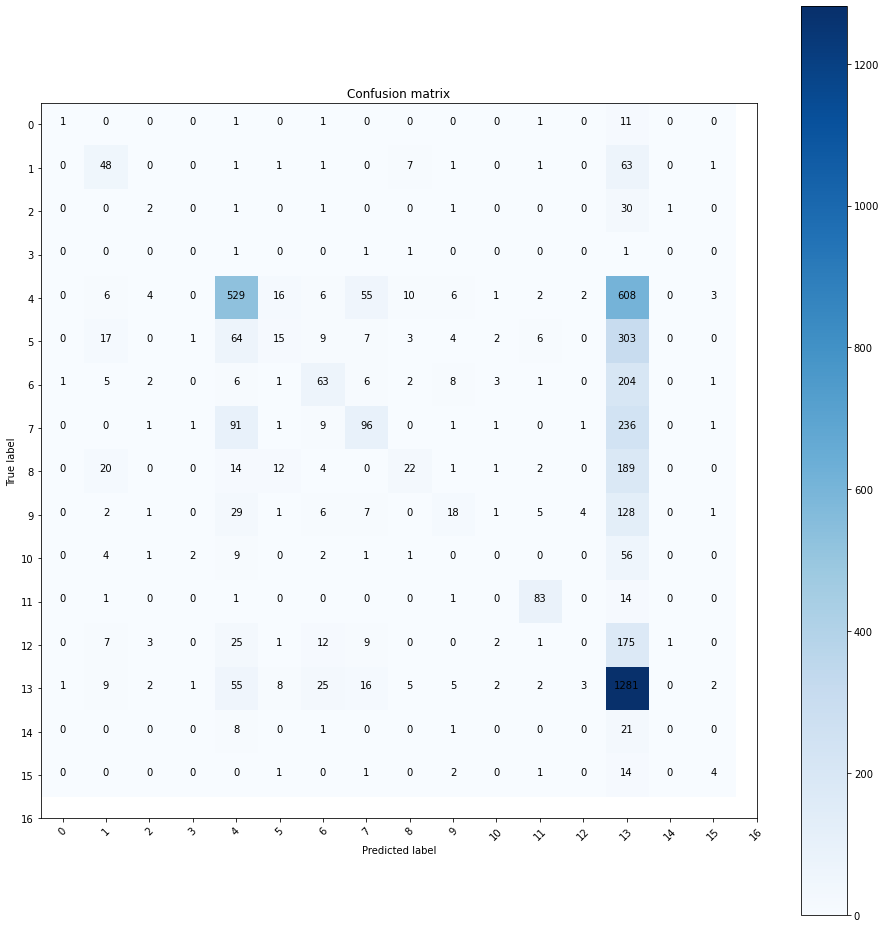

In [29]:
plt.rcParams['figure.figsize'] = (13, 13)

cm1=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm1, classes=range(0,17,1),
                      title='Confusion matrix')



plt.show()